# Day 1: Neural Network + MNIST Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape: (60000, 28, 28)


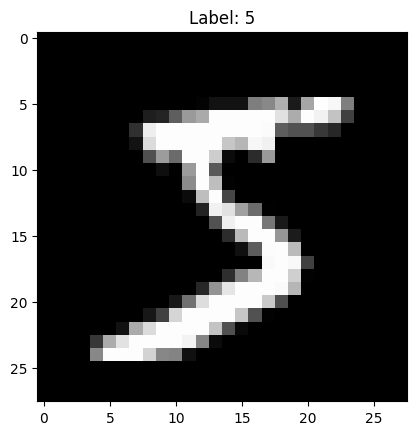

In [2]:
# Load the MNIST Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Shape:", X_train.shape)  # (60000, 28, 28)
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [3]:
#  Normalize + One-Hot Encode

# Scale pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert target to one-hot vectors
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [4]:
# 4. Build a Simple MLP Model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes (digits)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# train the model
history = model.fit(X_train, y_train_cat, epochs=10, validation_split=0.1, batch_size=128)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8227 - loss: 0.6371 - val_accuracy: 0.9635 - val_loss: 0.1430
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9550 - loss: 0.1560 - val_accuracy: 0.9685 - val_loss: 0.1118
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9689 - loss: 0.1037 - val_accuracy: 0.9722 - val_loss: 0.0977
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9762 - loss: 0.0765 - val_accuracy: 0.9730 - val_loss: 0.0947
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9838 - loss: 0.0587 - val_accuracy: 0.9772 - val_loss: 0.0762
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9858 - loss: 0.0467 - val_accuracy: 0.9767 - val_loss: 0.0784
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9883 - loss: 0.0403 - val_accuracy: 0.9787 - val_loss: 0.0768
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9913 - loss: 0.0292 - val_accuracy: 0.

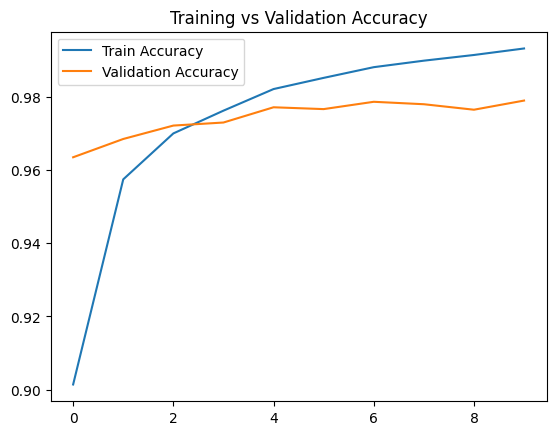

In [12]:
# visualization
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.savefig("Training vs Validation Accuracy.png", dpi=300, bbox_inches='tight')
plt.show()


In [9]:
# Evaluation
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9747 - loss: 0.0850
Test Accuracy: 0.9772999882698059


In [11]:
# classification report
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_labels))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.99      0.97      1032
           3       0.99      0.96      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.98      0.96      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

